In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA


In [24]:
data = pd.read_csv("Crude Oil WTI Futures Historical Data.csv")

In [25]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 23, 2019",54.17,55.35,55.60,53.24,807.15K,-2.13%
1,"Aug 22, 2019",55.35,55.94,56.46,54.85,621.57K,-0.59%
2,"Aug 21, 2019",55.68,56.05,57.13,55.55,704.04K,-1.17%
3,"Aug 20, 2019",56.34,56.10,56.60,55.28,47.45K,0.23%
4,"Aug 19, 2019",56.21,54.96,56.41,54.84,113.57K,2.44%


# Basic EDA

In [26]:
# from the data type date has object type and price has the float type
data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [27]:
data['Date']=pd.to_datetime(data['Date'])

In [28]:
# now date has the datetime type for our analysis of time series problems
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

# check the null values

In [29]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [30]:
#will convert the date into index
data=data.set_index("Date")

In [31]:
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-08-23,54.17,55.35,55.60,53.24,807.15K,-2.13%
2019-08-22,55.35,55.94,56.46,54.85,621.57K,-0.59%
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%


# Basic Feature Engineering ( DateTime Features)

We can extract weekday, month,, year , hours , minutes and seconds from a data value

In [32]:
data['Year']=data.index.year

In [33]:
data.head()

,Price,Open,High,Low,Vol.,Change %,Year
Date,,,,,,,
2019-08-23,54.17,55.35,55.60,53.24,807.15K,-2.13%,2019
2019-08-22,55.35,55.94,56.46,54.85,621.57K,-0.59%,2019
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%,2019
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%,2019
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%,2019


In [34]:
data['Month']=data.index.month

In [35]:
data['weekDay']=data.index.day_name()

In [36]:
data.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,weekDay
Date,,,,,,,,,
2019-08-23,54.17,55.35,55.60,53.24,807.15K,-2.13%,2019,8,Friday
2019-08-22,55.35,55.94,56.46,54.85,621.57K,-0.59%,2019,8,Thursday
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%,2019,8,Wednesday
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%,2019,8,Tuesday
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%,2019,8,Monday


# Visualizing Timesereis Data

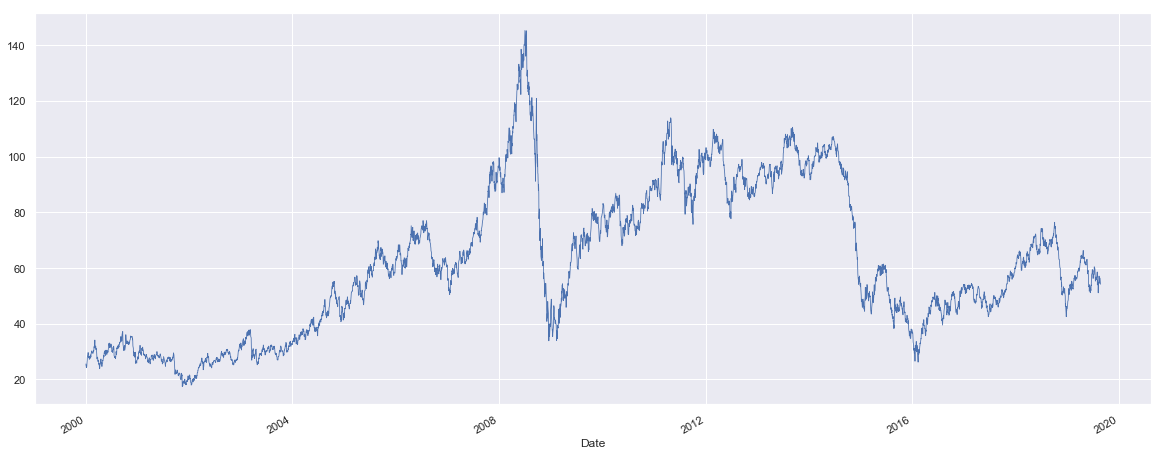

In [37]:
sns.set(rc={'figure.figsize':(20,8)})
data['Price'].plot(linewidth=0.8)

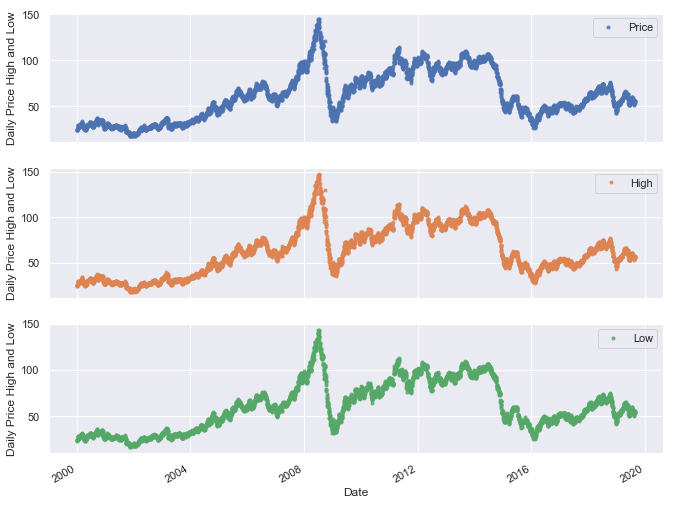

In [38]:
cols_plot=['Price','High', 'Low']
axes = data[cols_plot].plot(marker='.', alpha=0.8, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Price High and Low')

Text(0, 0.5, 'Close Look at Fuel Price')

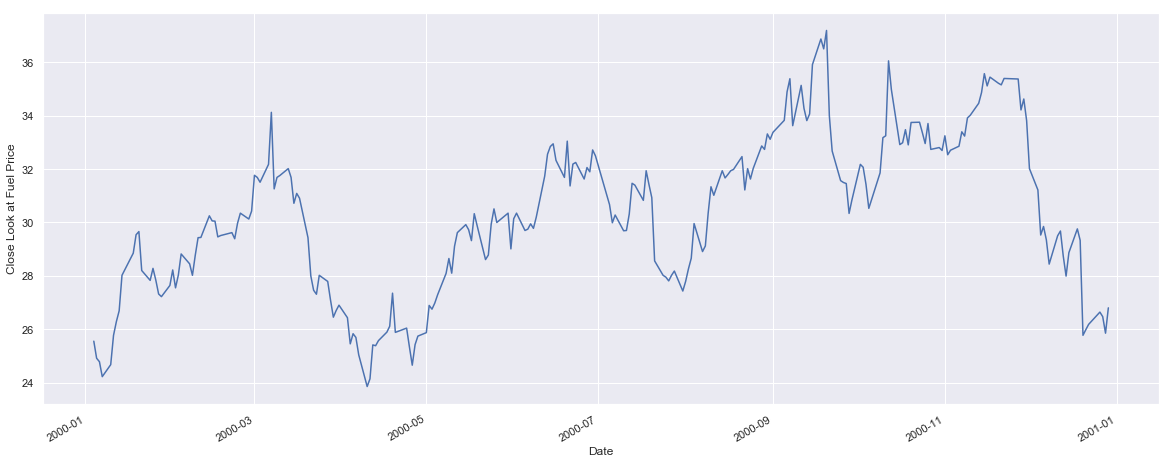

In [39]:
ax = data.loc['2000', 'Price'].plot()
ax.set_ylabel('Close Look at Fuel Price')

Text(0, 0.5, 'Close Look at Fuel Price ')

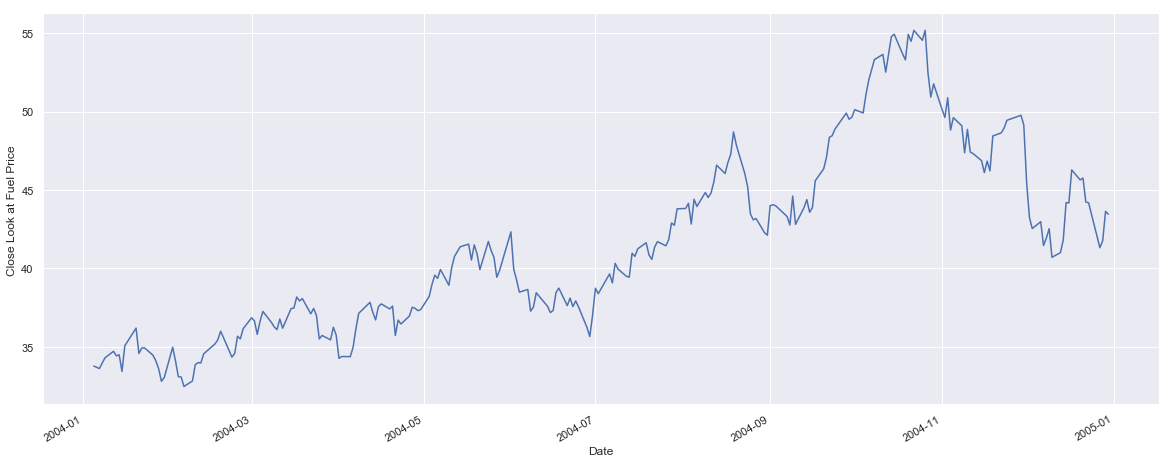

In [40]:
ax = data.loc['2004', 'Price'].plot()
ax.set_ylabel('Close Look at Fuel Price ')

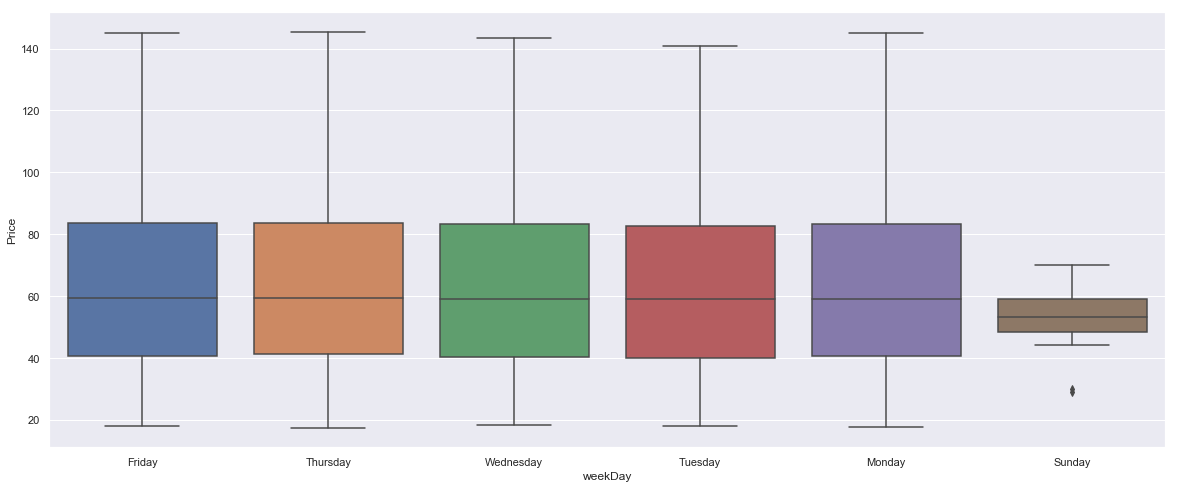

In [41]:
sns.boxplot(data=data, x='weekDay', y='Price')

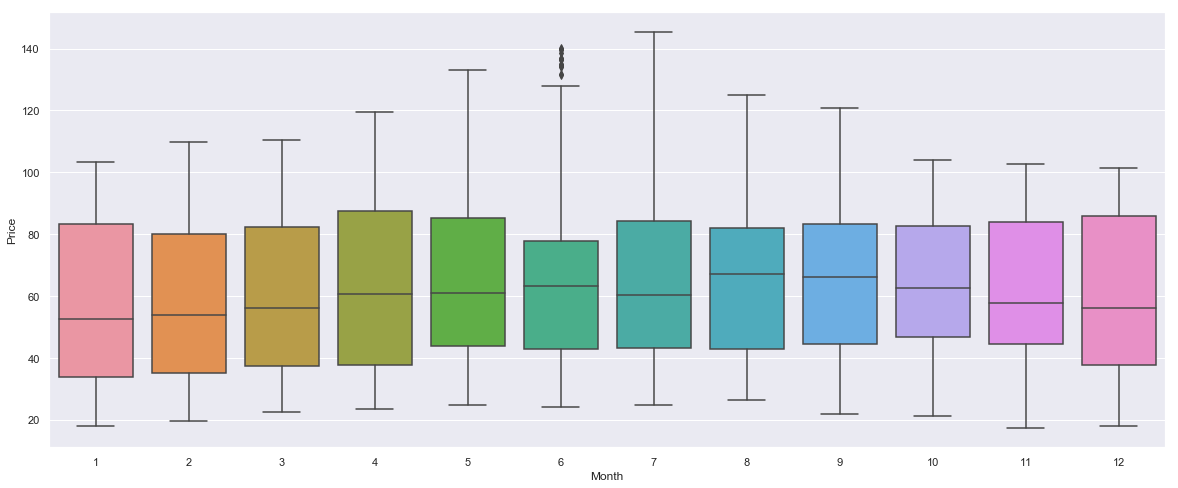

In [42]:
sns.boxplot(data=data, x='Month', y='Price')

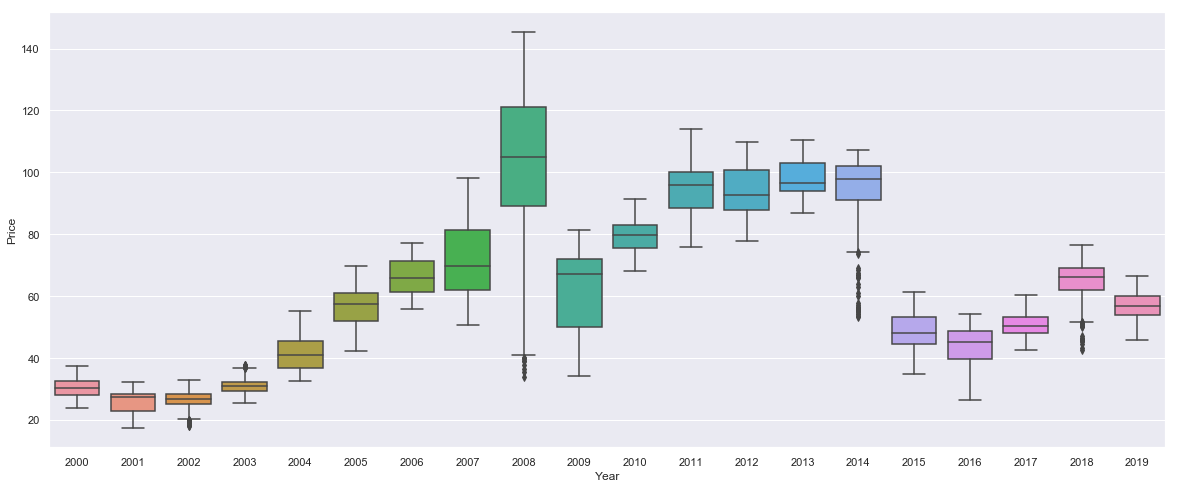

In [43]:
sns.boxplot(data=data, x='Year', y='Price')

# Timeseres Decomposition

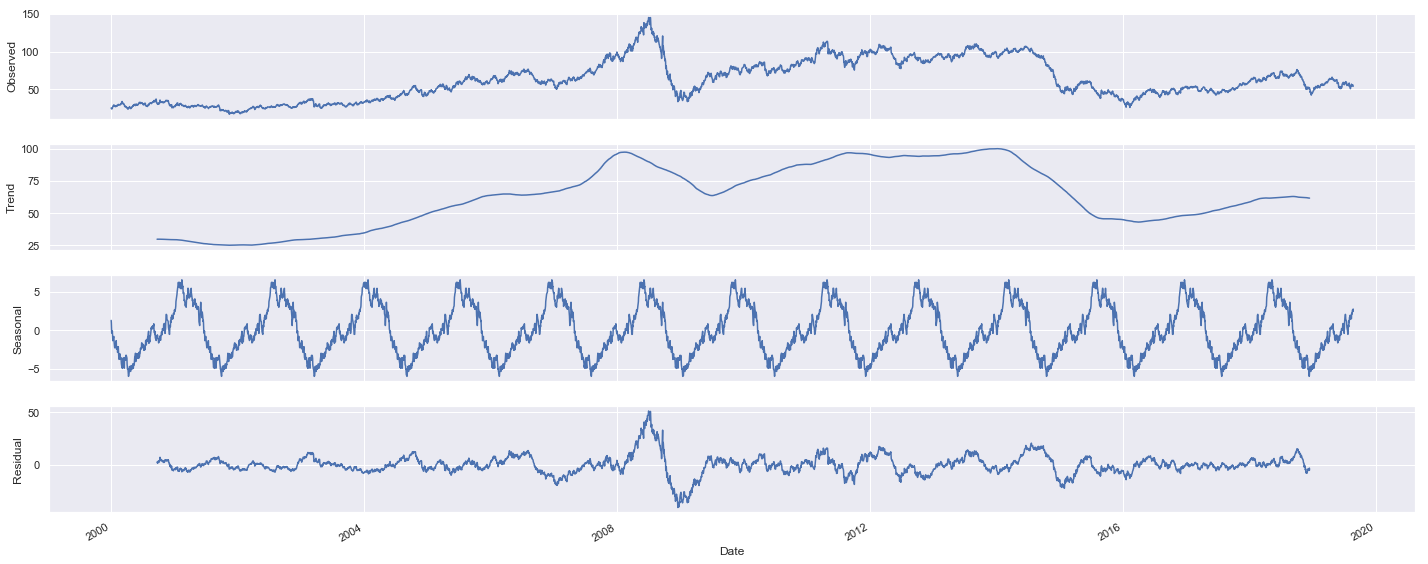

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Price'], model='additive', freq=365)
result.plot()
plt.show()

1. There is no uniform trend over the entire data time span. If you joint the first point on the TS to the last point in TS You will get a trend line .
2. There is a clear seasonal pattren which repeats itself every year

# 2.	The trend line is not uniform throughout the period. Use the data upt0 2008 only so that you have a single uniform trend in the data.

In [55]:
# Extacting the data from 2000 to 2008 so that we have only one uniform trend according to the question 
data2=data.loc['2008':]

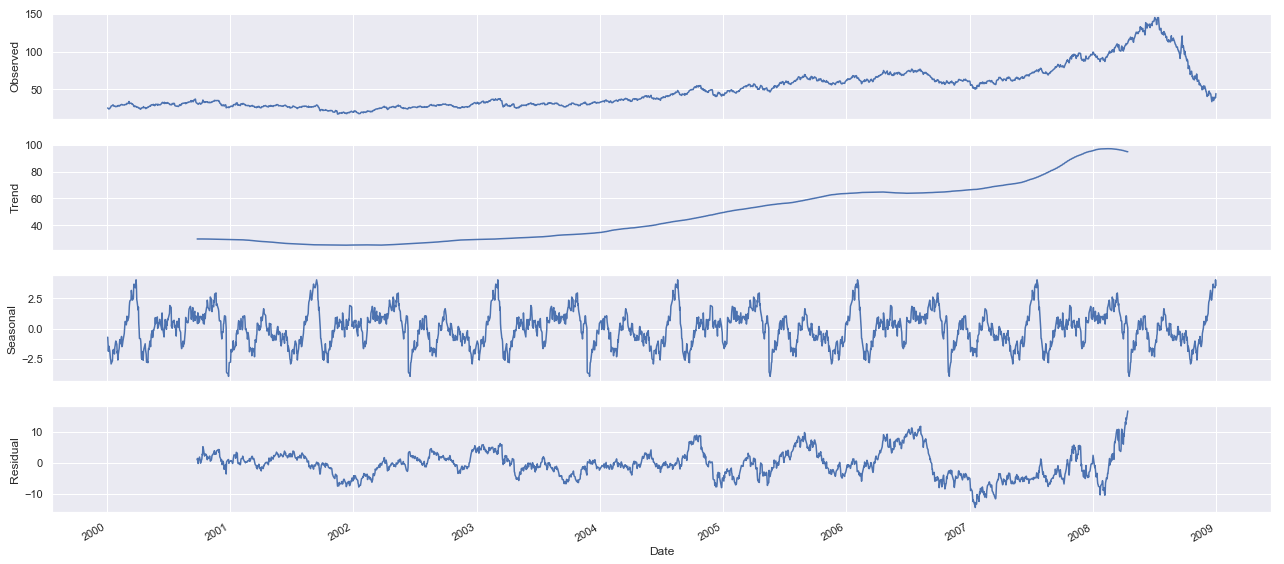

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data2['Price'], model='additive', freq=365)
result.plot()
plt.show()


In [63]:
data2.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,weekDay
Date,,,,,,,,,
2008-12-31,44.60,39.17,45.54,36.94,188.60K,14.27%,2008,12,Wednesday
2008-12-30,39.03,40.01,40.39,37.93,137.26K,-2.47%,2008,12,Tuesday
2008-12-29,40.02,38.40,42.20,37.53,150.60K,6.13%,2008,12,Monday
2008-12-26,37.71,35.70,38.03,35.60,64.55K,6.68%,2008,12,Friday
2008-12-24,35.35,39.15,39.69,35.13,93.38K,-9.31%,2008,12,Wednesday


In [64]:
data2.tail()

,Price,Open,High,Low,Vol.,Change %,Year,Month,weekDay
Date,,,,,,,,,
2000-01-10,24.67,24.22,24.75,24.02,68.90K,1.86%,2000,1,Monday
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,Friday
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,Thursday
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,Wednesday
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,Tuesday


# 3.	Use Mean and variance at different intervals of time series to check whether it is stationarity or not.

# Checking Stationarity

As we have studied in the class that we have three different method to check the stationarity of our data 


In [60]:
drop_column = ["Open", "High","Low","Vol.","Change %","Year","Month","weekDay"]

In [65]:
data2.drop(columns = drop_column, inplace = True)

C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
data2.head()

,Price
Date,
2008-12-31,44.60
2008-12-30,39.03
2008-12-29,40.02
2008-12-26,37.71
2008-12-24,35.35


# 1. By Looking at the Graph we can check the stationarity 

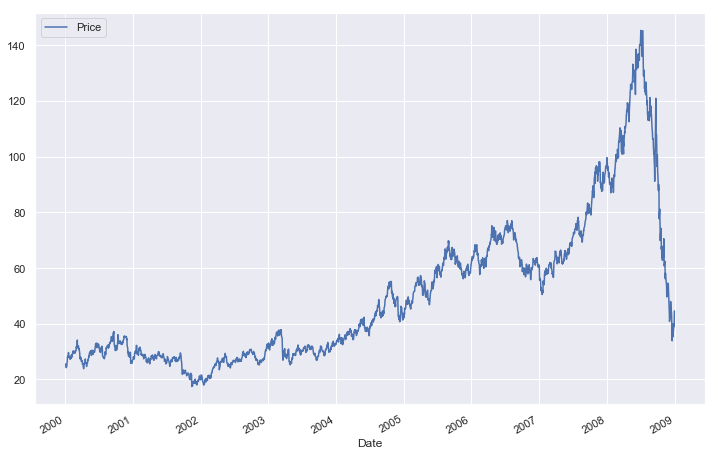

In [69]:
#The time series is not stationary
data2.plot(figsize=(12,8))

# b) Using Statistical Measures ( Mean & Variance)

In [70]:
#The time sereis non-stationary
X=data2.values
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1, mean2=X1.mean(),X2.mean()
var1, var2= X1.var(),X2.var()
print('mean1=%f,mean2=%f'%(mean1,mean2))
print('var1=%f,var2=%f'%(var1,var2))

mean1=70.904151,mean2=29.327360
var1=536.100443,var2=21.085878


# 4.Use ADF test to check whether Time Series is stationary or not.

In [88]:
series=pd.read_csv("Crude Oil WTI Futures Historical Data.csv",header=0, index_col=0,parse_dates=True,squeeze=True )

In [91]:
series= series["Price"].loc['2008':]

In [94]:
X=series.values
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.981490
p-value : 0.759955
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


From the Result Accept HO: Time Sereis is non-stationary

# 7.	Try out Power transforms ( Log, Square Root , Inverse ) using BoxCox Transformations . After each transformation check which results in improvement in ADF score. Stay with one which is better according to ADF.

### Achieving Stationarity

#### Power Transforms

In [95]:
#Log Transformation
X=series.values
X=np.log(X)
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.861107
p-value : 0.800511
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


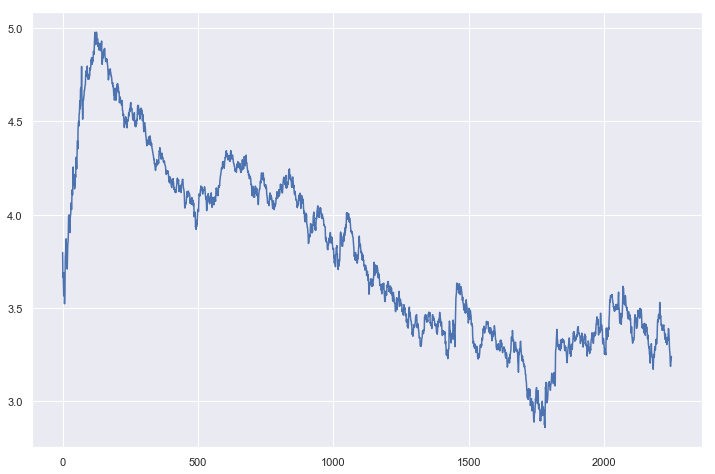

In [96]:
plt.figure(figsize=(12,8))
plt.plot(X)

#### Square-root Transformation

In [97]:
X=series.values
X=np.sqrt(X)
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.876107
p-value : 0.795739
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


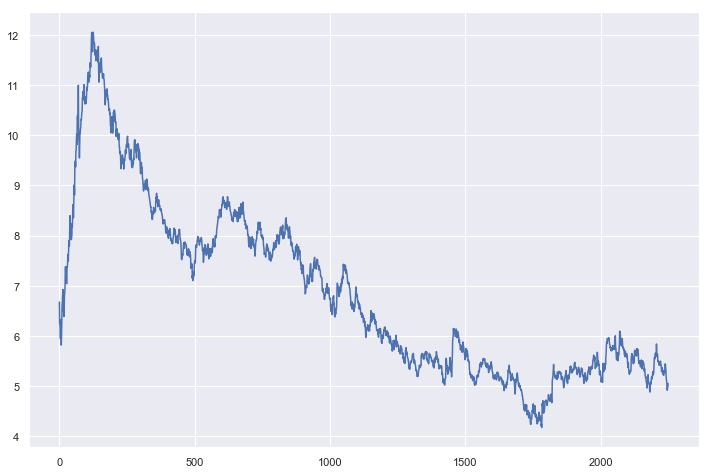

In [98]:
plt.figure(figsize=(12,8))
plt.plot(X)

(array([ 41.,  65., 212., 531., 251., 139., 258., 467., 154., 132.]),
 array([1.5212241 , 1.55250918, 1.58379426, 1.61507934, 1.64636441,
        1.67764949, 1.70893457, 1.74021965, 1.77150473, 1.8027898 ,
        1.83407488]),
 <a list of 10 Patch objects>)

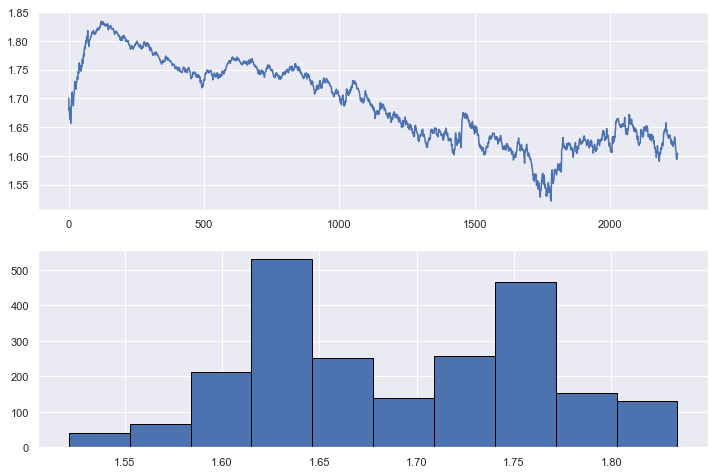

In [99]:
from scipy.stats import boxcox
df=pd.DataFrame(series.values)
df.columns=['Price']
df['Price']=boxcox(df['Price'],lmbda=-0.5)
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(df['Price'])
plt.subplot(212)
plt.hist(df['Price'],edgecolor='black')

# 8.	Apply moving average smoothing , again check the ADF score

### Moving Average Smothing

In [103]:
series=pd.read_csv("Crude Oil WTI Futures Historical Data.csv",header=0, index_col=0,parse_dates=True,squeeze=True )

In [104]:
series= series["Price"].loc['2008':]

In [105]:
series.head()

Date
2008-12-31    44.60
2008-12-30    39.03
2008-12-29    40.02
2008-12-26    37.71
2008-12-24    35.35
Name: Price, dtype: float64

In [106]:
series.tail()

Date
2000-01-10    24.67
2000-01-07    24.22
2000-01-06    24.78
2000-01-05    24.91
2000-01-04    25.55
Name: Price, dtype: float64

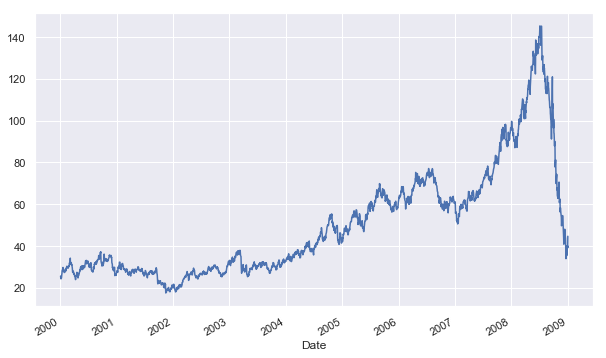

In [107]:
plt.figure(figsize=(10,6))
series.plot()

Date
2008-12-31          NaN
2008-12-30          NaN
2008-12-29    41.216667
2008-12-26    38.920000
2008-12-24    37.693333
2008-12-23    37.346667
2008-12-22    38.080000
2008-12-19    37.586667
2008-12-18    36.666667
2008-12-17    36.716667
Name: Price, dtype: float64


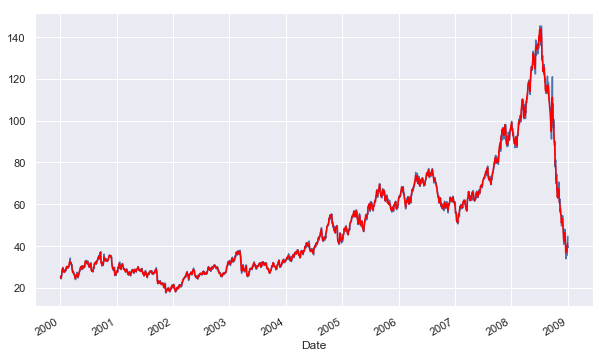

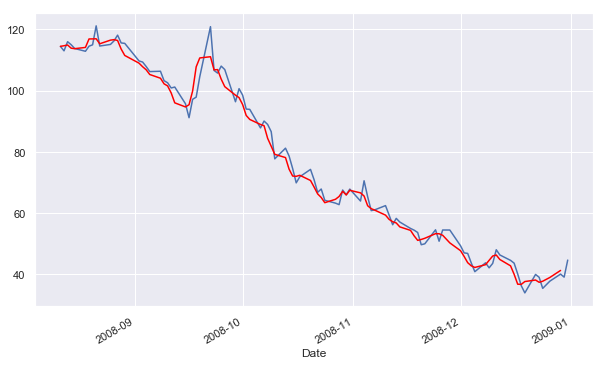

In [108]:
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot(figsize=(10,6))
rolling_mean.plot(color='red')
plt.show()
# zoomed plot original and transformed dataset
series[:100].plot(figsize=(10,6))
rolling_mean[:100].plot(color='red')
plt.show()

In [109]:
X=series.values
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.981490
p-value : 0.759955
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# 9.	Use differencing. Again, check ADF score and stationarity


### Differencing

In [110]:
diff = list()

In [111]:
diff

[]

In [112]:
X=series.values

In [113]:
X

array([44.6 , 39.03, 40.02, ..., 24.78, 24.91, 25.55])

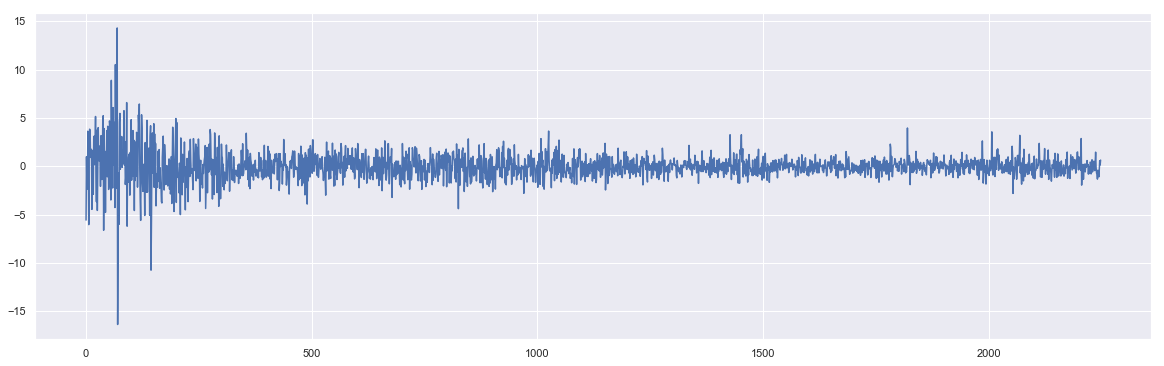

In [114]:
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff)
plt.show()

In [115]:
diff

[-5.57,
 0.990000000000002,
 -2.3100000000000023,
 -2.3599999999999994,
 3.6299999999999955,
 0.9299999999999997,
 -6.039999999999999,
 2.3500000000000014,
 3.8400000000000034,
 3.539999999999999,
 0.9099999999999966,
 1.7700000000000031,
 1.6999999999999957,
 -4.459999999999994,
 -1.4500000000000028,
 1.6400000000000006,
 -2.8999999999999986,
 2.8599999999999994,
 3.1199999999999974,
 0.1700000000000017,
 2.3200000000000003,
 5.149999999999999,
 0.00999999999999801,
 -3.6699999999999946,
 3.729999999999997,
 -4.57,
 -0.3100000000000023,
 4.0,
 0.7700000000000031,
 0.5600000000000023,
 2.0899999999999963,
 1.2000000000000028,
 -2.0800000000000054,
 3.1700000000000017,
 3.0799999999999983,
 -1.3699999999999974,
 -0.269999999999996,
 4.529999999999994,
 5.230000000000004,
 -6.6200000000000045,
 3.9000000000000057,
 -1.8500000000000085,
 1.5400000000000063,
 -4.770000000000003,
 0.490000000000002,
 0.9300000000000068,
 3.6899999999999977,
 -1.0900000000000034,
 4.140000000000001,
 3.35999

In [116]:
result=adfuller(diff)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.026509
p-value : 0.000000
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


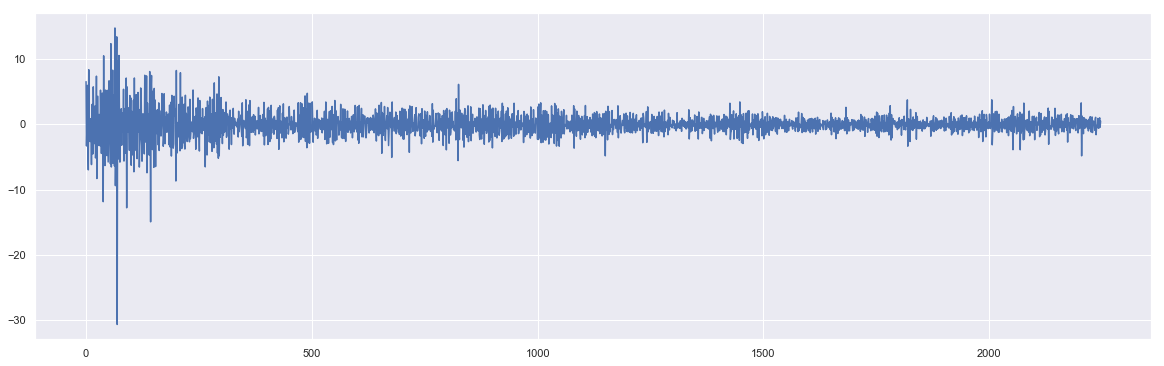

In [117]:
diff2=list()
for i in range(1, len(diff)):
    value = diff[i] - diff[i - 1]
    diff2.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff2)
plt.show()

In [118]:
result=adfuller(diff2)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.965675
p-value : 0.000000
 Citical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# 10.	Use 70/30 split and implement and AR Model. What is the RMSE?

In [124]:
series.head()

Date
2008-12-31    44.60
2008-12-30    39.03
2008-12-29    40.02
2008-12-26    37.71
2008-12-24    35.35
Name: Price, dtype: float64

In [125]:
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

       t    t+1
0    NaN  44.60
1  44.60  39.03
2  39.03  40.02
3  40.02  37.71
4  37.71  35.35


In [127]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Lag: 26
Coefficients: [ 0.07277313  0.92906066  0.01952025  0.04278905  0.07297554 -0.11829079
  0.07379738 -0.00714743 -0.02434192  0.01979716  0.00500675 -0.0097401
  0.05743502 -0.06971597  0.02505479  0.01377179  0.00305583 -0.04796507
  0.02028649  0.03654584 -0.0050755  -0.02781721 -0.01414861  0.05149087
 -0.04927969  0.05406381 -0.05276718]
predicted=26.660542, expected=26.280000
predicted=26.708490, expected=25.770000
predicted=26.706544, expected=24.670000
predicted=26.724836, expected=24.220000
predicted=26.703447, expected=24.780000
predicted=26.620953, expected=24.910000
predicted=26.685019, expected=25.550000
Test RMSE: 1.663


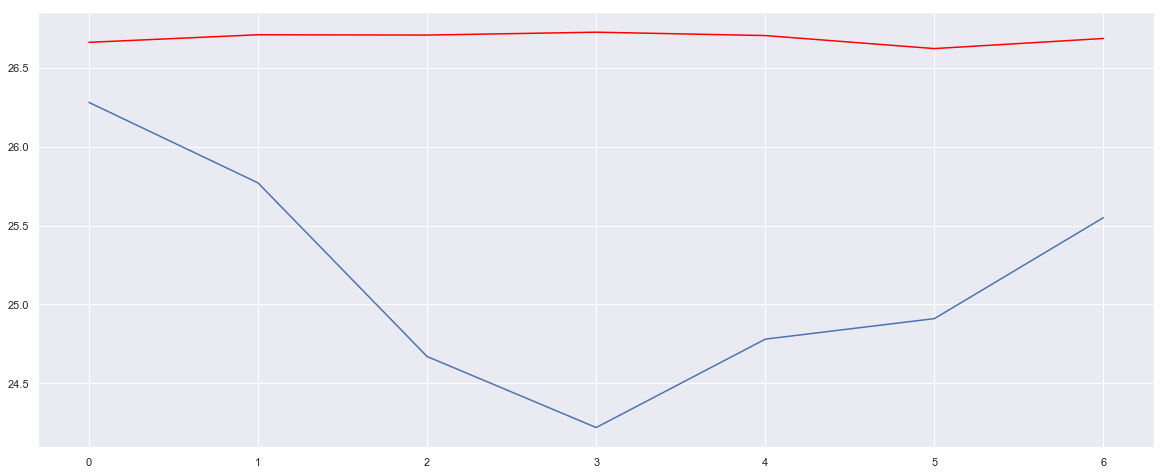

In [128]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 11.	Implement MA model on 70/30 split. What is the RMSE for persistence model ? What is the RMSE for MA Model.

In [129]:
series.head()

Date
2008-12-31    44.60
2008-12-30    39.03
2008-12-29    40.02
2008-12-26    37.71
2008-12-24    35.35
Name: Price, dtype: float64

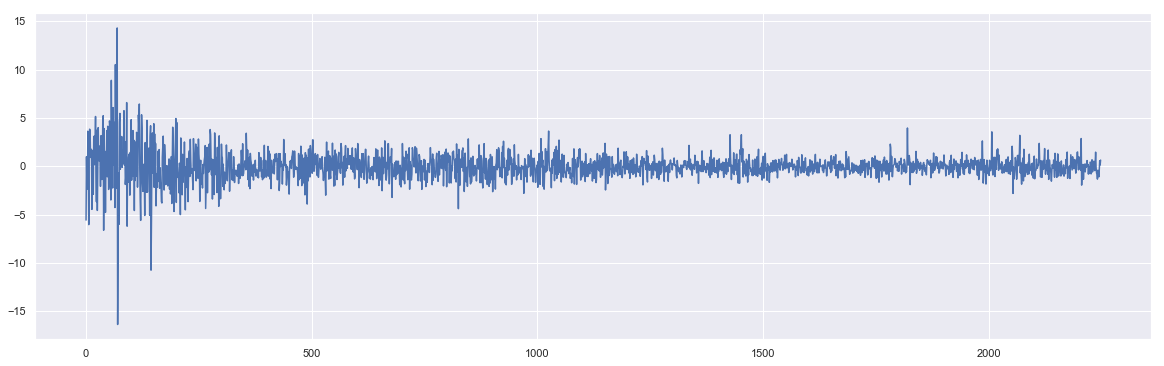

In [131]:
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff)
plt.show()

In [133]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.026509
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


data is stationary

In [141]:
dataframe=pd.DataFrame(series.values)
dataframe=pd.concat([series.shift(1),series],axis=1)
dataframe.columns=['t+1','t']

In [143]:
# split into train and test sets
X=dataframe.values
train_size=int(len(X)*0.66)
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

In [144]:
predictions=[x for x in test_X]
rmse=np.sqrt(mean_squared_error(test_y,predictions))
print('Test RMASE: %.3f' %rmse)
residuals=[test_y[i]-predictions[i]for i in range(len(predictions))]
residuals=pd.DataFrame(residuals)
print(residuals.head())

Test RMASE: 0.710
      0
0 -0.22
1 -0.96
2 -0.38
3  0.99
4 -1.03


In [145]:
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=24, Coef=[-0.01228224 -0.08249234 -0.04068874 -0.00671457  0.06863849 -0.05639791
  0.03284501  0.01521614 -0.01655623  0.01918909  0.00852644  0.00502544
  0.07193801 -0.00537793  0.01782573  0.03957614  0.03282912 -0.02016529
 -0.00301139  0.05274041  0.04525756  0.00613112 -0.00598963  0.04575289
 -0.00713288]


In [146]:
window

24

In [147]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]


In [148]:
history

[-0.3100000000000023,
 0.20000000000000284,
 -1.009999999999998,
 0.7199999999999989,
 0.6000000000000014,
 0.5,
 -1.6400000000000006,
 0.4199999999999946,
 -0.8999999999999986,
 1.2100000000000009,
 0.36999999999999744,
 -0.19999999999999574,
 -0.1600000000000037,
 -0.4399999999999977,
 -0.5899999999999963,
 -0.3300000000000054,
 -0.9600000000000009,
 0.6400000000000006,
 -0.9600000000000009,
 -0.22999999999999687,
 -0.3500000000000014,
 -0.8200000000000003,
 0.75,
 0.3400000000000034]

predicted error=-0.009544, expected error=-0.220000
predicted error=-0.181750, expected error=-0.960000
predicted error=0.101799, expected error=-0.380000
predicted error=-0.077203, expected error=0.990000
predicted error=-0.141221, expected error=-1.030000
predicted error=0.003118, expected error=0.600000
predicted error=-0.095570, expected error=1.760000
predicted error=-0.222670, expected error=-0.700000
predicted error=-0.182277, expected error=-0.250000
predicted error=0.069001, expected error=-0.450000
predicted error=0.039469, expected error=-0.840000
predicted error=-0.169851, expected error=-0.110000
predicted error=0.083361, expected error=-0.580000
predicted error=-0.091221, expected error=0.310000
predicted error=-0.113311, expected error=-1.430000
predicted error=0.129298, expected error=0.520000
predicted error=-0.217532, expected error=1.020000
predicted error=-0.088462, expected error=0.980000
predicted error=-0.077838, expected error=-1.230000
predicted error=0.092853,

predicted error=0.358323, expected error=-0.300000
predicted error=0.233999, expected error=0.220000
predicted error=-0.081999, expected error=-0.380000
predicted error=0.005624, expected error=-0.580000
predicted error=0.236841, expected error=0.230000
predicted error=0.093773, expected error=-0.110000
predicted error=0.192771, expected error=-0.050000
predicted error=-0.170539, expected error=0.590000
predicted error=0.048633, expected error=0.010000
predicted error=0.096371, expected error=0.190000
predicted error=-0.003766, expected error=-0.810000
predicted error=-0.185568, expected error=-0.010000
predicted error=-0.012290, expected error=-0.660000
predicted error=0.241707, expected error=-0.750000
predicted error=-0.058041, expected error=0.430000
predicted error=-0.170469, expected error=0.370000
predicted error=-0.144158, expected error=-0.790000
predicted error=0.146955, expected error=-0.480000
predicted error=-0.082428, expected error=0.670000
predicted error=-0.145942, exp

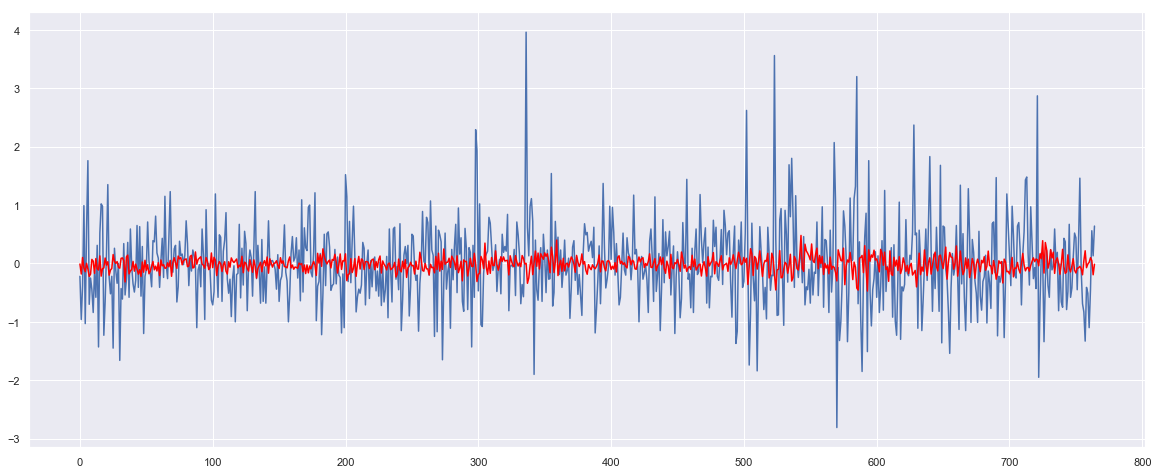

In [149]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

predicted error=-0.009544, expected error=-0.220000
predicted error=-0.181750, expected error=-0.960000
predicted error=0.101799, expected error=-0.380000
predicted error=-0.077203, expected error=0.990000
predicted error=-0.141221, expected error=-1.030000
predicted error=0.003118, expected error=0.600000
predicted error=-0.095570, expected error=1.760000
predicted error=-0.222670, expected error=-0.700000
predicted error=-0.182277, expected error=-0.250000
predicted error=0.069001, expected error=-0.450000
predicted error=0.039469, expected error=-0.840000
predicted error=-0.169851, expected error=-0.110000
predicted error=0.083361, expected error=-0.580000
predicted error=-0.091221, expected error=0.310000
predicted error=-0.113311, expected error=-1.430000
predicted error=0.129298, expected error=0.520000
predicted error=-0.217532, expected error=1.020000
predicted error=-0.088462, expected error=0.980000
predicted error=-0.077838, expected error=-1.230000
predicted error=0.092853,

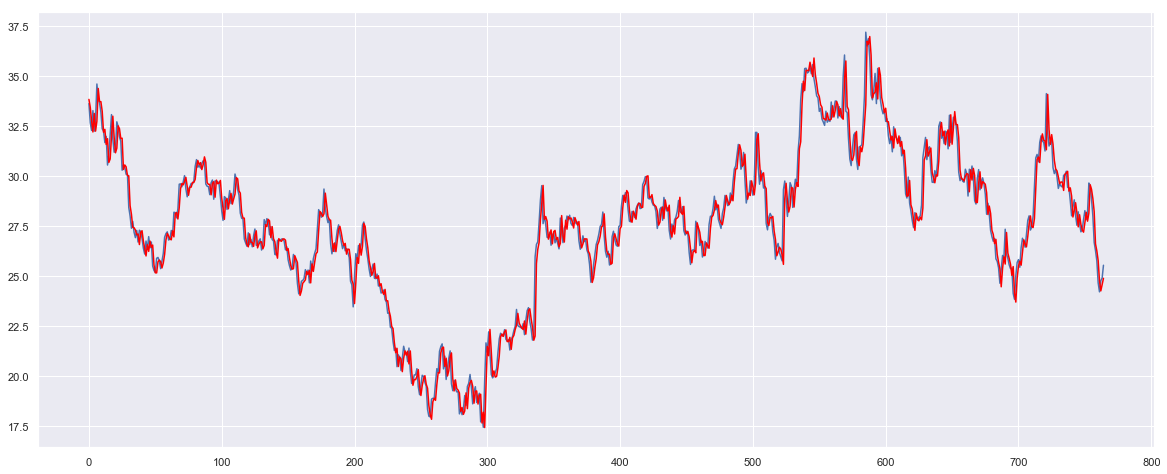

In [150]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

# 12.	Plot ACF and PACF to choose p and q. Implement ARMA (p,q). What is the RMSE?

### Correlation Plots

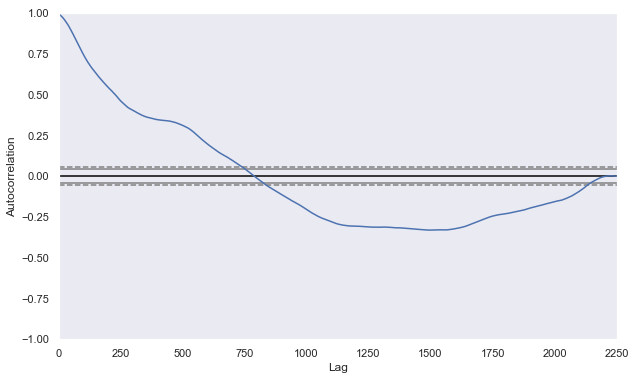

In [152]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
autocorrelation_plot(series)
plt.show()

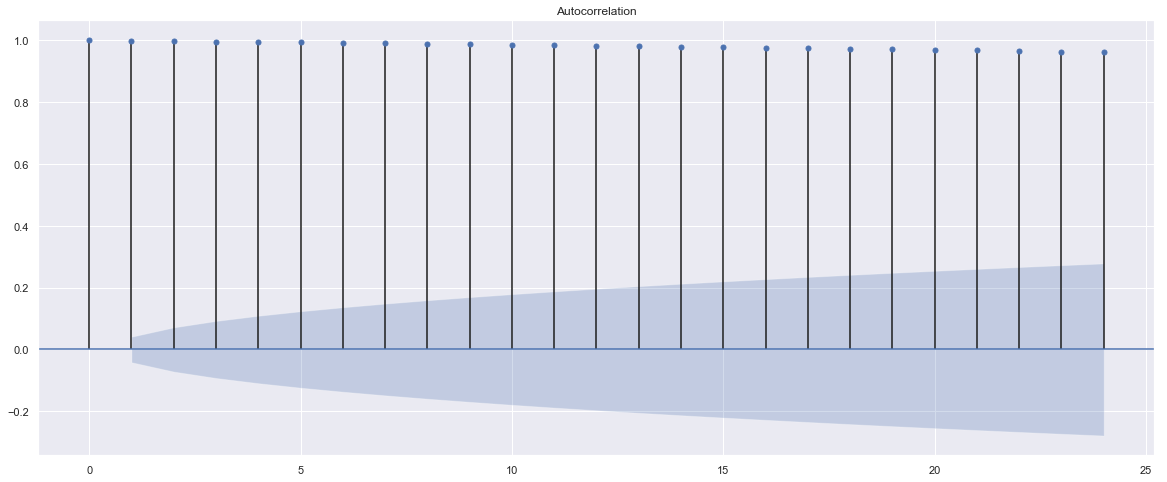

In [153]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=24)
plt.show()

<Figure size 720x432 with 0 Axes>

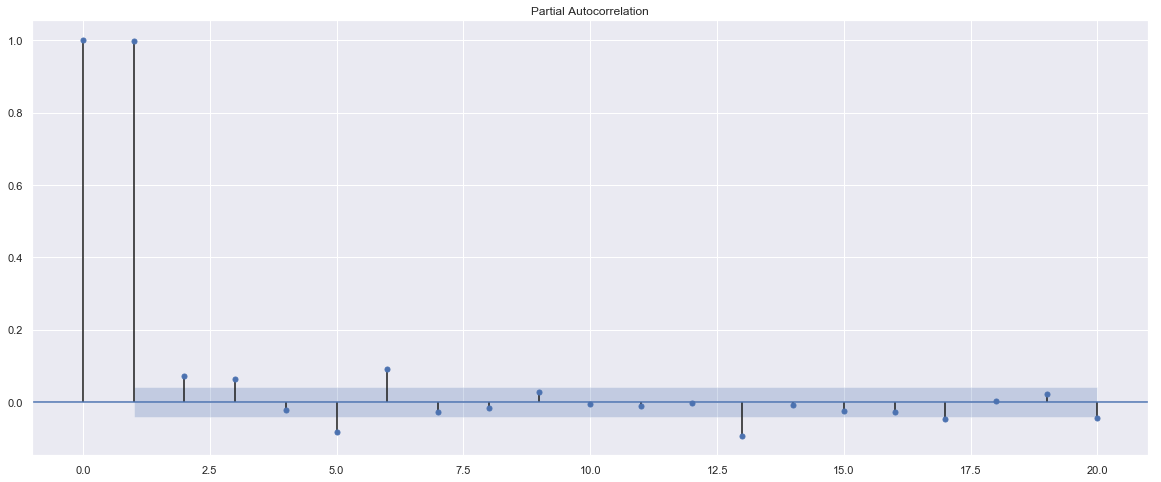

In [154]:
plt.figure(figsize=(10,6))
plot_pacf(series,lags=20)
plt.show()

# Implementing ARMA using ARMA(p,q)

predicted=33.855070, expected=33.630000
predicted=33.684755, expected=32.670000
predicted=32.792783, expected=32.290000
predicted=32.369643, expected=33.280000
predicted=33.238725, expected=32.250000
predicted=32.371099, expected=32.850000
predicted=32.845527, expected=34.610000
predicted=34.494501, expected=33.910000
predicted=33.994906, expected=33.660000
predicted=33.723917, expected=33.210000
predicted=33.289622, expected=32.370000
predicted=32.484940, expected=32.260000
predicted=32.315894, expected=31.680000
predicted=31.771408, expected=31.990000
predicted=32.008414, expected=30.560000
predicted=30.721672, expected=31.080000
predicted=31.087293, expected=32.100000
predicted=32.050531, expected=33.080000
predicted=33.028412, expected=31.850000
predicted=31.987383, expected=31.200000
predicted=31.304541, expected=31.370000
predicted=31.401837, expected=32.720000
predicted=32.643935, expected=32.490000
predicted=32.539271, expected=31.970000
predicted=32.055130, expected=31.750000


predicted=26.271541, expected=26.580000
predicted=26.589061, expected=27.560000
predicted=27.512361, expected=27.710000
predicted=27.727435, expected=26.880000
predicted=26.986233, expected=26.310000
predicted=26.402186, expected=25.870000
predicted=25.950333, expected=25.360000
predicted=25.445576, expected=24.990000
predicted=25.064479, expected=25.350000
predicted=25.361901, expected=25.610000
predicted=25.624812, expected=24.900000
predicted=24.997116, expected=24.880000
predicted=24.925993, expected=25.110000
predicted=25.130474, expected=24.510000
predicted=24.598567, expected=24.560000
predicted=24.599553, expected=24.160000
predicted=24.233527, expected=24.200000
predicted=24.239324, expected=24.310000
predicted=24.340420, expected=23.840000
predicted=23.918794, expected=23.710000
predicted=23.764334, expected=23.150000
predicted=23.238767, expected=23.170000
predicted=23.212871, expected=22.450000
predicted=22.551654, expected=22.400000
predicted=22.450276, expected=21.740000


predicted=28.228428, expected=28.130000
predicted=28.166010, expected=27.930000
predicted=27.977414, expected=28.370000
predicted=28.365578, expected=28.550000
predicted=28.562412, expected=28.660000
predicted=28.679395, expected=28.380000
predicted=28.432112, expected=28.410000
predicted=28.439376, expected=29.580000
predicted=29.513167, expected=29.740000
predicted=29.747757, expected=29.980000
predicted=29.987056, expected=29.910000
predicted=29.942373, expected=28.910000
predicted=29.021384, expected=28.860000
predicted=28.900233, expected=28.980000
predicted=29.000417, expected=28.710000
predicted=28.760895, expected=28.550000
predicted=28.594521, expected=28.520000
predicted=28.553400, expected=28.230000
predicted=28.283974, expected=27.390000
predicted=27.491283, expected=27.770000
predicted=27.775198, expected=28.360000
predicted=28.339645, expected=28.450000
predicted=28.468288, expected=27.800000
predicted=27.882442, expected=28.940000
predicted=28.880277, expected=28.460000


predicted=30.452059, expected=29.120000
predicted=29.249479, expected=28.910000
predicted=28.961611, expected=29.960000
predicted=29.905442, expected=28.660000
predicted=28.783440, expected=28.260000
predicted=28.326792, expected=27.790000
predicted=27.858250, expected=27.430000
predicted=27.489998, expected=28.180000
predicted=28.151282, expected=28.020000
predicted=28.056059, expected=27.810000
predicted=27.855303, expected=27.950000
predicted=27.968313, expected=28.020000
predicted=28.041601, expected=28.560000
predicted=28.544341, expected=30.930000
predicted=30.765822, expected=31.420000
predicted=31.391348, expected=31.940000
predicted=31.919028, expected=30.830000
predicted=30.937894, expected=31.400000
predicted=31.386175, expected=31.470000
predicted=31.485641, expected=30.320000
predicted=30.434536, expected=29.700000
predicted=29.781290, expected=29.690000
predicted=29.721129, expected=30.280000
predicted=30.259803, expected=29.990000
predicted=30.034722, expected=30.670000


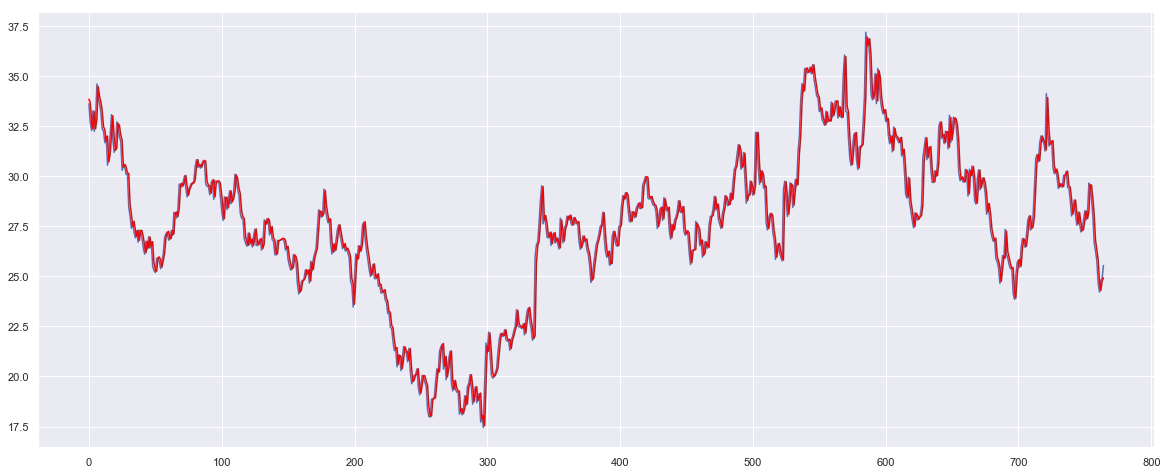

In [155]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARMA(history, order=(1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 13.	Implement ARIMA (p,d,q) using proper parameter values for p, d and q.

In [176]:
X = diff2
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [177]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.475621, expected=-0.560000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.186742, expected=-0.740000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.999967, expected=0.580000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.537340, expected=1.370000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-1.018642, expected=-2.020000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.945840, expected=1.630000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.627822, expected=1.160000
predicted=-1.937708, expected=-2.460000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.789854, expected=0.450000
predicted=0.443432, expected=-0.200000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.500966, expected=-0.390000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.934653, expected=0.730000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.106734, expected=-0.470000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.565624, expected=0.890000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.390334, expected=-1.740000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.413103, expected=1.950000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.599742, expected=0.500000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-1.145104, expected=-0.040000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-1.182516, expected=-2.210000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.373969, expected=0.580000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.730808, expected=0.820000
predicted=-0.126321, expected=1.180000
predicted=-1.468811, expected=-1.580000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.112605, expected=-0.290000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.665660, expected=0.300000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.230217, expected=-1.230000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=1.480415, expected=1.710000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.284304, expected=-0.380000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.031856, expected=-0.220000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.247503, expected=0.340000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.106616, expected=-1.660000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.609937, expected=1.230000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.484562, expected=-0.180000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.456348, expected=0.950000
predicted=-0.570753, expected=-0.880000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.297900, expected=0.270000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.120198, expected=0.630000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.620007, expected=-0.940000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.353015, expected=1.170000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.723572, expected=-0.650000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.190796, expected=-0.290000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.212608, expected=-0.140000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.348402, expected=0.200000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.140057, expected=0.940000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.908550, expected=-1.060000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.231410, expected=1.040000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.831690, expected=-1.190000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.388056, expected=0.850000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.413312, expected=-1.490000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.135297, expected=0.980000
predicted=0.151867, expected=0.120000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.091052, expected=0.810000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.939785, expected=-0.670000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.131656, expected=-0.200000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.038791, expected=-0.240000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.365523, expected=0.790000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.529244, expected=-0.020000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.503741, expected=0.440000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.

predicted=-0.973918, expected=-0.630000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.297648, expected=-0.090000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.126781, expected=-0.500000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.418656, expected=0.460000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.071387, expected=0.380000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.491673, expected=-0.670000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.207332, expected=1.390000
predicted=-1.247297, expected=-1.170000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.032297, expected=-0.240000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.321472, expected=0.710000
predicted=-0.459524, expected=0.780000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-1.273023, expected=-1.210000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.001600, expected=-0.170000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.295895, expected=0.400000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.133088, expected=0.060000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.233713, expected=-0.970000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.763029, expected=0.260000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.531397, expected=0.780000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.348416, expected=-0.250000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.104646, expected=0.030000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.097725, expected=-0.180000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.099070, expected=0.160000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.071404, expected=0.590000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.702620, expected=-0.390000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.291133, expected=-0.720000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.520501, expected=0.470000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.059955, expected=-0.220000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.247472, expected=0.360000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.132041, expected=-0.100000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.046644, expected=-0.190000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.167650, expected=-1.040000
predicted=1.289425, expected=0.990000
predicted=0.243690, expected=0.090000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.050012, expected=-0.380000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.441738, expected=0.990000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.601915, expected=-0.450000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.172915, expected=-1.100000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.038966, expected=1.880000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.929826, expected=-0.960000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.014302, expected=0.040000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.044330, expected=-0.120000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.163132, expected=-0.510000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.696137, expected=-0.080000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.829429, expected=0.230000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.505101, expected=1.670000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-1.296559, expected=-1.250000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.042976, expected=-0.520000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.613055, expected=1.070000
predicted=-0.514349, expected=-0.040000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.534660, expected=-1.100000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.661220, expected=0.860000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.183032, expected=0.190000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.465198, expected=0.470000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.931566, expected=-1.140000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.294159, expected=-0.240000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.637314, expected=0.240000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.346376, expected=-0.640000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=0.976852, expected=0.660000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.287514, expected=0.210000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=-0.010868, expected=-0.960000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=1.036077, expected=0.810000
predicted=0.258816, expected=0.020000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


predicted=0.071283, expected=0.840000


C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return self.hessian(params, *args) / nobs


predicted=-0.794324, expected=-1.260000


LinAlgError: SVD did not converge

# 14.	Implement Grid Search ARIMA (p, d, and q)? Mention the grid values you have used for p, d and q. Which is the best combination of parameters? What is the RMSE?

In [178]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse 

In [179]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [180]:
p_values = [0, 1, 2, 4]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")

In [ ]:
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=28.001
ARIMA(0, 0, 1) RMSE=14.376
ARIMA(0, 1, 0) RMSE=0.710
ARIMA(0, 1, 1) RMSE=0.713
ARIMA(1, 0, 0) RMSE=0.712
ARIMA(1, 0, 1) RMSE=0.714
ARIMA(1, 1, 0) RMSE=0.713
